Векторы в NumPy.
=======

Перед началом работы в любой библиотеке, ее на импортировать:

In [4]:
import numpy as np

А далее можно начать работать с объектами библиотеки, в данном случае - с многомерными массивами.

* ***Термины***

Однако, измерения массива в данной библиотеке называются осями (axis-axes), а их количество -  рангом (rank).

Например, массив из трех элементов, который является, по сути, координатой точки в трехмерном пространстве,

In [5]:
a = np.array([1, 2, 1])
print(a)

[1 2 1]


имеет ранг 1 и одну ось, а другой массив

In [6]:
b = np.array([[1, 0, 1], [0, 2, 1]])
print(b)

[[1 0 1]
 [0 2 1]]


имеет ранг 2 и две оси.

Проверить количество измерений, т.е. осей можно с помощью

In [7]:
print(a.ndim, b.ndim)

1 2


Размеры массива можно узнать
так:

In [8]:
print(b.shape, '\n', b.size)

(2, 3) 
 6


* ***Векторы***

Чтобы работать с векторами, т.е. матрицами 1 на n, удобнее представлять их в виде списка списка, представляющего одну строку.

In [9]:
a = np.array([[1, 2, 3]])
print(a)

[[1 2 3]]


Благодаря такому представлению мы можем совершать определенные действия с векторами. Например, транспонирование:

In [10]:
b = a.T
print(b)

[[1]
 [2]
 [3]]


С векторами можно проводить матричные операции: прибавить число, умножить на число, сложить вектора.

In [11]:
print(b + 3, a * 2, a + b, sep='\n'*2)

[[4]
 [5]
 [6]]

[[2 4 6]]

[[2 3 4]
 [3 4 5]
 [4 5 6]]


И еще пара методов, которые иногда полезны. Другие методы можно легко найти в документации.

In [12]:
b = a.sum()
c = a.max()
d = a.min()
print(b, c, d)

6 3 1


<https://docs.scipy.org/doc/numpy/reference/>

Операции с матрицами.
======

* ***Умножение***

In [13]:
a = np.diag(range(1, 4))
print(a)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [14]:
b = np.diag(range(5, 0, -1))
print(b)

[[5 0 0 0 0]
 [0 4 0 0 0]
 [0 0 3 0 0]
 [0 0 0 2 0]
 [0 0 0 0 1]]


Расссмотрим операцию перемножения матриц. Ее можно представить так:

In [15]:
c = a * b
print(c)

ValueError: operands could not be broadcast together with shapes (3,3) (5,5) 

или:

In [16]:
c = a.dot(b)
print(c)

ValueError: shapes (3,3) and (5,5) not aligned: 3 (dim 1) != 5 (dim 0)

Однако это совпадение. Если взять другие массивы, например:

In [17]:
a = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
b = a.copy()
print(a, '\n' * 2, b)

[[1 2 3]
 [1 2 3]
 [1 2 3]] 

 [[1 2 3]
 [1 2 3]
 [1 2 3]]


In [18]:
c = a * b
print(c)

[[1 4 9]
 [1 4 9]
 [1 4 9]]


In [19]:
c = a.dot(b)
print(c)

[[ 6 12 18]
 [ 6 12 18]
 [ 6 12 18]]


Как видим, * перемножает матрицы поэлементно, а dot() по правилу перемножения матриц.

* ***Определитель***

Теперь же мы приступим к более серьёзным вещам, которые есть в NumPy. Начнем с модуля numpy.linalg, позволяющего делать многие интересные операции из линейной алгебры.

Для начала начнем с простого. Посмотрим, как считать определитель матрицы:

In [20]:
a = np.array([[1, 4, 3]] * 3)
print(a)

[[1 4 3]
 [1 4 3]
 [1 4 3]]


In [21]:
d = np.linalg.det(a)
print(d)

0.0


Для каждой матрицы значение определителя является важным параметром. Если определитель матрицы равен 0, то она называется вырожденной. 

In [22]:
a = np.array([np.arange(1, 4), np.arange(4, 1, -1), np.arange(3, 6)])
print(a, '\n' * 2, np.linalg.det(a))

[[1 2 3]
 [4 3 2]
 [3 4 5]] 

 -3.885780586188051e-16


Определитель можно считать не только для матриц ранга 2, но для матриц любого ранга. Однако тогда для матриц ранга >=2 он по отдельности будет считать определители двумерных матриц, которые входят в исходную.

In [23]:
a = np.array([[[1, 1], [2, 2]], [[1, 2], [2, 1]]])
print(a, '\n' * 2)
print(np.linalg.det(a))

[[[1 1]
  [2 2]]

 [[1 2]
  [2 1]]] 


[ 0. -3.]


* ***Обращение матриц***

С помощью того же модуля можно найти обратную матрицу (обратная матрица — такая матрица, при умножении на которую исходная матрица даёт в результате единичную матрицу) к данной:

In [24]:
a = np.array([[1, 4, 3]] * 3)
b = np.linalg.inv(a)
print(b)

LinAlgError: Singular matrix

Эта ошибка обозначает, что матрица, от которой мы хотим найти обратную, вырожденная, т.е. ее определитель равен 0. Проверим это:

In [25]:
b = np.linalg.det(a)
print(b)

0.0


Чтобы изменить значение определителя, достаточно изменить пару элементов матрицы.

In [26]:
a[0][0] = 4
a[1][2] = 1
print(a)

[[4 4 3]
 [1 4 1]
 [1 4 3]]


In [27]:
b = np.linalg.det(a)
print(b)

24.000000000000004


In [28]:
b = np.linalg.inv(a)
print(b)

[[ 0.33333333  0.         -0.33333333]
 [-0.08333333  0.375      -0.04166667]
 [ 0.         -0.5         0.5       ]]


* ***Скалярное произведение***

Скалярное произведение можно найти двумя способами (тут без подвохов, результат в любом случае будет один и тот же). Первый - функция, второй - метод.

In [29]:
a = np.array([1, 3, 5])
b = np.array([2, 4, 6])

In [30]:
c = np.dot(a, b)
print(c)

44


In [31]:
c = a.dot(b)
print(c)

44


Как видно, скалярное произведение векторов по сути является перемножением матриц 1 на n.

Эффективность операций
==========

На этом моменте может возникнуть закономерный вопрос: зачем писать отдельную библиотеку для реализации операций с матрицами, когда это возможно сделать вручную и зачастую довольно быстро?

Давайте сравним скорость работы программы, которую мы напишем сами для поэлементного перемножения матриц и функции из NumPy.

In [32]:
import time

Очень интересный модуль Python, который позволяет работать со временем. Из него мы возьмем только функцию time.time(), которая возвращает время, выраженное в секундах.

In [33]:
a = np.diag(range(1, 6))
b = np.diag(range(5, 0, -1))
t0 = time.time()
c = a * b
t1 = time.time()
print('{0:.8f} Seconds'.format(t1 - t0))
print(c)

0.00000000 Seconds
[[5 0 0 0 0]
 [0 8 0 0 0]
 [0 0 9 0 0]
 [0 0 0 8 0]
 [0 0 0 0 5]]


In [34]:
d = np.zeros((5, 5))
t0 = time.time()
for i in range(5):
    for j in range(5):
        d[i][j] = a[i][j] * b[i][j]
t1 = time.time()
print('{0:.8f} Seconds'.format(t1 - t0))
print(d)

0.00000000 Seconds
[[5. 0. 0. 0. 0.]
 [0. 8. 0. 0. 0.]
 [0. 0. 9. 0. 0.]
 [0. 0. 0. 8. 0.]
 [0. 0. 0. 0. 5.]]


Соответственно более сложные операции не сократят разницу во времени работы.

In [35]:
a = np.array([[1, 3, 3, 4], [7, 2, 12, 4], [1, -2, 3, -4], [10, 7, 2, -9]])
b = a.copy()
t0 = time.time()
c = np.dot(a, b)
t1 = time.time()
print('{0:.8f} Seconds'.format(t1 - t0))
print(c)

0.00000000 Seconds
[[ 65  31  56 -32]
 [ 73  29  89 -48]
 [-50 -35 -20  20]
 [-29 -23 102 141]]


In [36]:
d = np.zeros((4, 4))
t0 = time.time()
for i in range(4):
    for j in range(4):
        for k in range(4):
            d[i][j] += a[i][k] * b[k][j]
t1 = time.time()
print('{0:.8f} Seconds'.format(t1 - t0))
print(d)

0.00000000 Seconds
[[ 65.  31.  56. -32.]
 [ 73.  29.  89. -48.]
 [-50. -35. -20.  20.]
 [-29. -23. 102. 141.]]


Matplotlib.
======

Matplotlib - это питоновская библиотека для создания двухмерных графиков высокого качества (publication quality). Достаточно проста в обращении и позволяет в несколько строк рисовать графики и диаграммы.

Как и другие библиотеки импортируется (в данном случае сразу с модулем, с помощью которого строятся графики):

In [37]:
import matplotlib.pyplot as plt

* ***plot()***

plot() является основным методом для создания графиков:

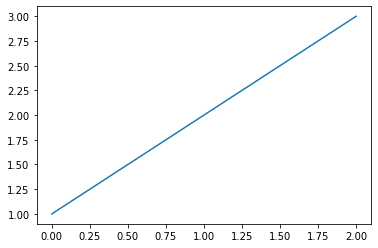

In [38]:
plt.plot(np.array([1,2,3]))
plt.show()

Может возникнуть вопрос почему по оси X у нас значения от 0 до 2, а по Y - от 1 до 3. Если вы передадите один список или массив команде plot(), то matplotlib воспринимает его как последовательность Y значений и автоматически генерирует значения X. Поскольку python начинает считать с 0, по умолчанию вектор X имеет такую же длинну как Y, но начинается с нуля.

plot() - универсальный метод и в него можно передавать произвольное количество аргументов. Например, для того, чтобы отобразить y в зависимости от x, можно выполнить команду:

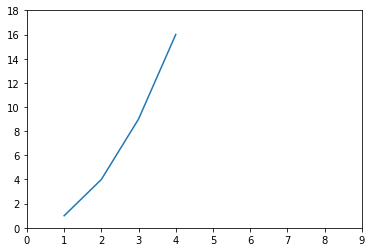

In [39]:
plt.plot([1,2,3,4], [1,4,9,16])
plt.axis([0, 9, 0, 18])
plt.show()

Метод axis() получает в качестве аргументов [xmin, xmax, ymin, ymax] которые устанавливают минимальные и максимальные границы осей.

Для каждой пары аргументов x-y существует необязательный третий аргумент - строка форматирования, которая определяет цвет и тип линии. По умолчанию строка форматирования выглядит как b-, что значит непрерывная синяя линия. Для того чтобы отобразить данные из предыдущего примера красными кружками нужно ввести ro, а чтобы зелеными плюсиками - g+.

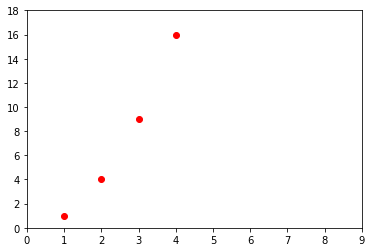

In [40]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 9, 0, 18])
plt.show()

Однако, если бы matplotlib мог работать только со списками, ты был бы довольно бесполезен для обработки данных. И тут в силу вступает NumPy. Как правило для построения графиков используются матрицы, и внутри matplotlib все данные переводятся в массивы numpy.

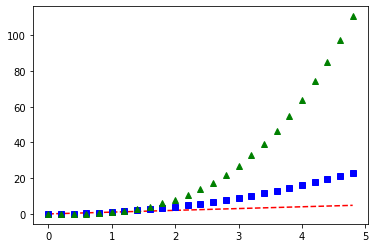

In [41]:
a = np.arange(0., 5., 0.2)
plt.plot(a, a, 'r--', a, a**2, 'bs', a, a**3, 'g^')
plt.show()

У линий есть множество атрибутов которые вы можете установить: толщина, стиль, антиалиасинг и т.д.

Например:

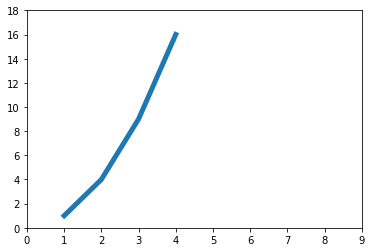

In [42]:
plt.plot([1,2,3,4], [1,4,9,16], linewidth=5.0)
plt.axis([0, 9, 0, 18])
plt.show()

* ***Гистограммы и диаграммы***

Напомним, что ***гистограмма*** — один из типов диаграмм, способ графического представления табличных данных, в котором количественные соотношения некоторого показателя представлены в виде прямоугольников, площади которых пропорциональны вкладу. Для того, чтобы проиллюстрировать это определение и то, как его можно получить, напишем небольшую программу:

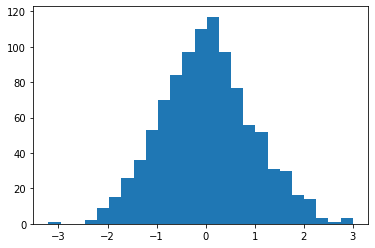

In [43]:
y = np.random.randn(1000)
plt.hist(y, 25)
plt.show()

Здесь мы используем метод randn() модуля numpy.random, который создает массив из случайных точек в соответствии с Гауссовым распределением, и функцию hist(). Первым аргументом она принимает массив чисел, вторым необязательным аргументом является число полос, на которые будет разбит массив. По умолчанию это число равно десяти, мы присвоили ему значение 25.

Кроме гистограмм на практике часто используются ***графики рассеяния***.

Такой тип графиков позволяет изображать одновременно два множества данных, которые не образуют кривой, а представляются именно в виде двухмерного множества точек. Каждая точка имеет две координаты. График рассеяния часто используется для определения связи между двумя величинами и позволяет определить более точные пределы измерений.

В модуле matplotlib.pyplot имеется своя функция, для графика рассеяния - scatter(). Как от нее и ожидается, она принимает две последовательности и изображает их на плоскости в виде маркеров, по умолчанию они круглые и синие. Но естественно, их можно изменять:

C:\Anaconda\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


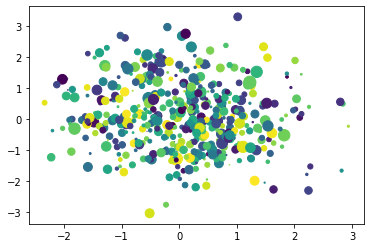

In [44]:
x = np.random.randn(1000)
y = np.random.randn(1000)

size = 50*np.random.randn(1000)
colors = np.random.rand(1000)

plt.scatter(x, y, s=size, c=colors)
plt.show()

* s задает размер маркеров и может быть как одним числом для всех, так и представлять массив значений

* c задает цвет маркеров, также либо один для всех, либо множество

И еще одна часто используемая диаграмма - ***круговая диаграмма*** или, как ее еще назвают, пончиковая диаграмма.

Такой вид диаграмм используется, когда для нас существенно сравнение вклада каждого участника в общее дело. Функция для диаграммы называется pie() и принимает первым аргументом последовательность из внесенных единиц, а поледующими - любое из многочисленных keywords:

* colors задает используемые цвета, в которые раскрашиваются куски «пирога»

* labels задает имена, по одному на каждый элемент x

* labeldistance определяет радиальное расстояние на котором эти имена выводятся

* autopct задает тип форматирования численных значений

* shadow добавляет тень

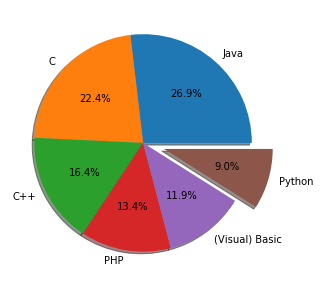

In [45]:
plt.figure(figsize=(7,5))
x = [18, 15, 11, 9, 8, 6]
labels = ['Java', 'C', 'C++', 'PHP', '(Visual) Basic', 'Python']
explode = [0, 0, 0, 0, 0, 0.2]

plt.pie(x, labels = labels, explode = explode, autopct = '%1.1f%%', shadow=True);
plt.show()

Здесь так же употребляется инструкция figure(figsize=(7,5)), которая, как несложно понять, задает размеры нашего эллипса.

Цвет в таких диаграммах чередуется сам собой, порядок по умолчанию для matplotlib: blue, green, red, cyan, magenta, yellow.

Seaborn. *
==

Seaborn это  библиотека для Python, основанная на Matplotlib, которая предоставляет высокоуровневый интерфейс для красивого визуализирования данных. Отличается от Matplotlib тем, что имеет встроенные функции обработки данных, которые позволяют быстрее и удобнее работать с графиками.

* *пример 1*

In [46]:
import seaborn as sns
sns.set()
flights_long = sns.load_dataset("flights")
print(flights_long)

     year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
5    1949       June         135
6    1949       July         148
7    1949     August         148
8    1949  September         136
9    1949    October         119
10   1949   November         104
11   1949   December         118
12   1950    January         115
13   1950   February         126
14   1950      March         141
15   1950      April         135
16   1950        May         125
17   1950       June         149
18   1950       July         170
19   1950     August         170
20   1950  September         158
21   1950    October         133
22   1950   November         114
23   1950   December         140
24   1951    January         145
25   1951   February         150
26   1951      March         178
27   1951      April         163
28   1951        May         172
29   1951 

Здесь мы создаем объект set(), к которым будем работать, и импортируем, как и в следующем куске кода, данные по полетам, которые хранятся в самой библиотеке seaborn.

In [47]:
flights = flights_long.pivot("month", "year", "passengers")
print(flights)

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237 

Figure(648x432) AxesSubplot(0.125,0.125;0.775x0.755)


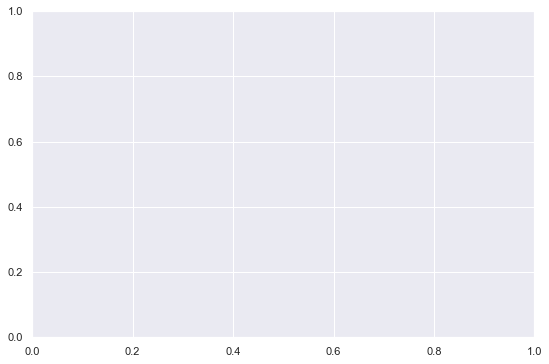

In [48]:
f, ax = plt.subplots(figsize=(9, 6))
print(f, ax)

Задаем размеры будущей таблицы.

In [53]:
sns.heatmap(flights, annot=True, fmt="d", linewidths=1, ax=ax)
plt.show()

Задаем параметры таблицы: толщина разделительных линий, наличие данных в ней и т.д. 

* *пример 2*

In [50]:
import pandas as pd

Pandas - библиотека для анализа данных. Более подробно будет рассмотрена в следующей лекции, сейчас мы просто будем ее использовать.

In [48]:
sns.set()
rs = np.random.RandomState(5)
mean = [0, 0]
cov = [(1, .5), (.5, 1)]

В этом примере мы будем визуализировать множество точек. Они с определенным распределением создаются методом random'а RandomState(). Кроме того задаем центр и параметры распределения.

In [54]:
x1, x2 = rs.multivariate_normal(mean, cov, 500).T
x1 = pd.Series(x1, name="$X_1$")
x2 = pd.Series(x2, name="$X_2$")

NameError: name 'rs' is not defined

Здесь мы преобразуем множество для представления на графике.

In [55]:
g = sns.jointplot(x1, x2, kind="kde", size=7, space=0)
plt.show()

NameError: name 'x1' is not defined

Как мы видим, способов визуализации графиков или множеств достаточно много и они не очень сложные. В них имеется большое количество методов, на разбор которых уйдет очень много времени, однако они все есть в открытом доступе.